In [ ]:
import pandas as pd

# Arbitrary value Imputaion

It consists of replacing Nan by any arbitrary value

In [ ]:
df = pd.read_csv("train.csv", usecols = ['Age','Fare','Survived'])

In [ ]:
df.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [ ]:
df["Age_arbit"] = df.Age.fillna(100)
df.head(10)

,Survived,Age,Fare,Age_arbit
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,100.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


<Axes: >

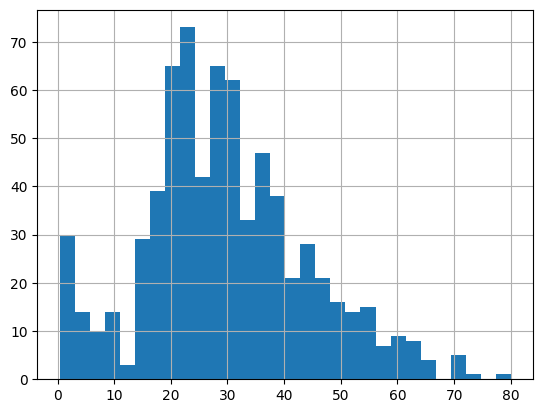

In [ ]:
df.Age.hist(bins=30)

<Axes: >

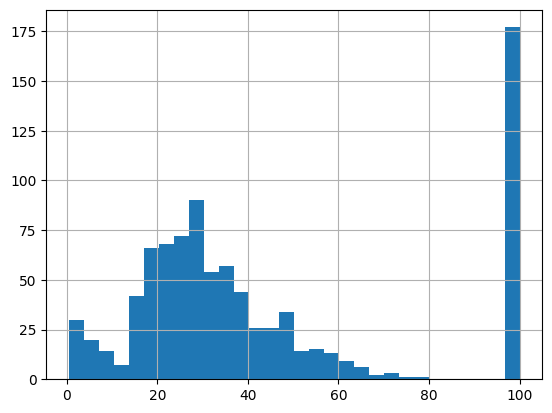

In [ ]:
df.Age_arbit.hist(bins=30)

One can you any end of distribution  

Just Another Way to find the importance of Nan value and easy to implement but it really distroys your distribution


# Handling Missing Categorical Data

**Frequent Category Imputaion**

In [ ]:
df = pd.read_csv("train_house.csv", usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
df.shape

(1460, 4)

In [ ]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [ ]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

<Axes: >

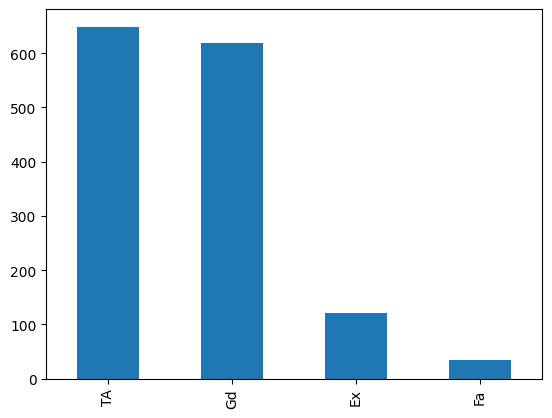

In [ ]:
#Compute the frequency of each feature
df.BsmtQual.value_counts().plot.bar()

<Axes: >

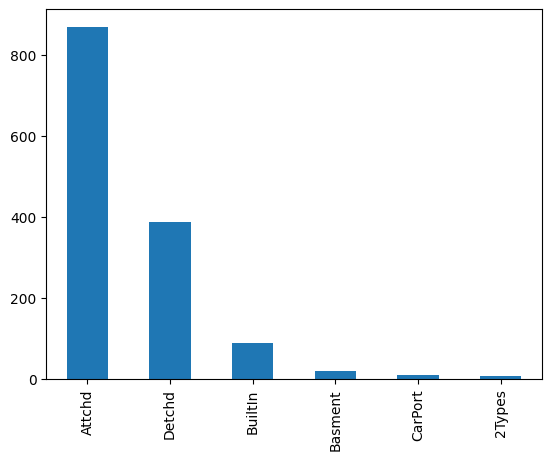

In [ ]:
df.GarageType.value_counts().plot.bar()

<Axes: >

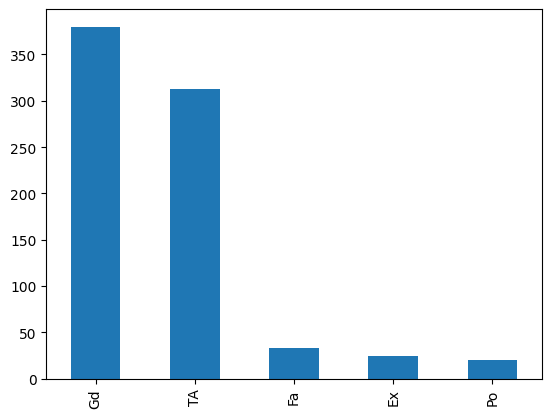

In [ ]:
df.FireplaceQu.value_counts().plot.bar()

In [ ]:
df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [ ]:
# Maximum Frequency
df.GarageType.value_counts().index[0]

'Attchd'

In [ ]:
#Another Way
df.GarageType.mode()[0]

'Attchd'

In [ ]:
def impute_nan(df, variable):
  df[variable].fillna(df[variable].value_counts().index[0],inplace=True)

In [ ]:
for feature in ['BsmtQual', 'GarageType']:
  impute_nan(df,feature)

In [ ]:
df.isnull().mean()

BsmtQual       0.000000
FireplaceQu    0.472603
GarageType     0.000000
SalePrice      0.000000
dtype: float64

Can't do this with FireplaceQu as the frequency of missing values is very high

# Adding a variable to capture NaN

In [ ]:
df = pd.read_csv("train_house.csv", usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
import numpy as np

In [ ]:
df["BsmtQual_null"] = np.where(df.BsmtQual.isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_null
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [ ]:
frequent = df.BsmtQual.mode()[0]
frequent

'TA'

In [ ]:
df['BsmtQual'] = df.BsmtQual.fillna(frequent)

In [ ]:
df.isnull().sum()

BsmtQual           0
FireplaceQu      690
GarageType        81
SalePrice          0
BsmtQual_null      0
dtype: int64

Used for features having the impotance of NaN value

**Another Way:**
If suppose all category are kinda equally frequent and we dont want to disturb its distribution, We can replace Nan with a new category

In [ ]:
df = pd.read_csv("train_house.csv", usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
def impute_category(df, variable):
  df[variable + '_new'] = np.where(df[variable].isnull(),"Missing",df[variable])

In [ ]:
for feature in ['BsmtQual', 'GarageType', 'FireplaceQu']:
  impute_category(df,feature)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new,GarageType_new,FireplaceQu_new
0,Gd,NaN,Attchd,208500,Gd,Attchd,Missing
1,Gd,TA,Attchd,181500,Gd,Attchd,TA
2,Gd,TA,Attchd,223500,Gd,Attchd,TA
3,TA,Gd,Detchd,140000,TA,Detchd,Gd
4,Gd,TA,Attchd,250000,Gd,Attchd,TA


<Axes: >

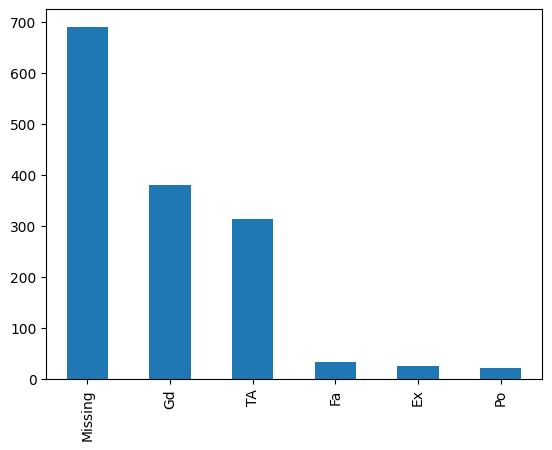

In [ ]:
df.FireplaceQu_new.value_counts().plot.bar()